### Figures, Axes, and Subplots
The base of a visualization in matplotlib is a Figure object. Contained within each Figure will be one or more Axes objects, each Axes object containing a number of other elements that represent each plot. In the earliest examples, these objects have been created implicitly

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

pokemon = pd.read_csv('data/pokemon.csv')

(array([ 31.,  93., 163., 159., 128., 115.,  81.,  26.,   6.,   5.]),
 array([  5. ,  20.5,  36. ,  51.5,  67. ,  82.5,  98. , 113.5, 129. ,
        144.5, 160. ]),
 <a list of 10 Patch objects>)

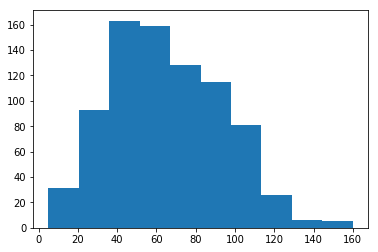

In [2]:
plt.hist(data = pokemon, x = 'speed')

One alternative way we could have created the histogram is to explicitly set up the Figure and Axes.

(array([ 31.,  93., 163., 159., 128., 115.,  81.,  26.,   6.,   5.]),
 array([  5. ,  20.5,  36. ,  51.5,  67. ,  82.5,  98. , 113.5, 129. ,
        144.5, 160. ]),
 <a list of 10 Patch objects>)

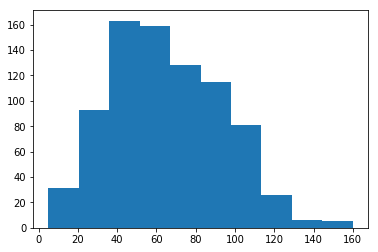

In [3]:
fig = plt.figure()
ax = fig.add_axes([.125, .125, .775, .755])
ax.hist(data = pokemon, x = 'speed')

To use Axes objects with seaborn, seaborn functions usually have an "ax" parameter to specify upon which Axes a plot will be drawn.

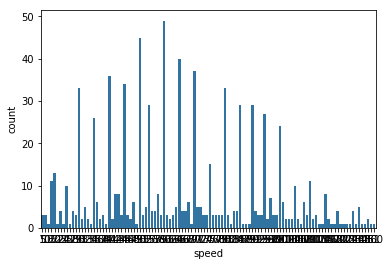

In [5]:
fig = plt.figure()
ax = fig.add_axes([.125, .125, .775, .755])
base_color = sb.color_palette()[0]
sb.countplot(data = pokemon, x='speed', color = base_color, ax = ax)

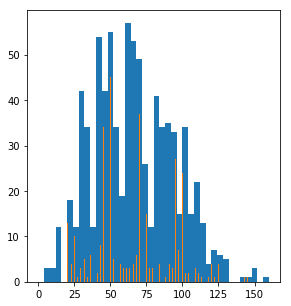

In [8]:
plt.figure(figsize = [10, 5]) # larger figure size for subplots

# example of somewhat too-large bin size
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
bin_edges = np.arange(0, pokemon['speed'].max()+4, 4)
plt.hist(data = pokemon, x = 'speed', bins = bin_edges)

# example of somewhat too-small bin size
#plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bin_edges = np.arange(0, pokemon['speed'].max()+1/4, 1/4)
plt.hist(data = pokemon, x = 'speed', bins = bin_edges);

### Aditional techniques

If you don't assign Axes objects as they're created, you can retrieve the current Axes using ax = plt.gca(), or you can get a list of all Axes in a Figure fig by using axes = fig.get_axes(). As for creating subplots, you can use fig.add_subplot() in the same way as plt.subplot() above. If you already know that you're going to be creating a bunch of subplots, you can use the plt.subplots() function:


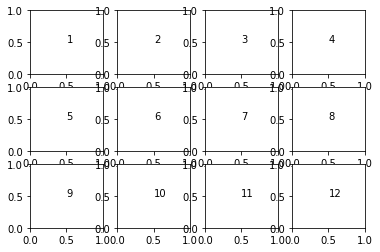

In [11]:
fig, axes = plt.subplots(3, 4) # grid of 3x4 subplots
axes = axes.flatten() # reshape from 3x4 array into 12-element vector
for i in range(12):
    plt.sca(axes[i]) #set the current Axes
    plt.text(0.5, 0.5, i + 1) # print conventional subplot index number to middle of Axes
    

### Descriptive Statistics, Outliers, and Axis Limits
Note any aspects of the data like number of modes and skew, and note the presence of outliers in the data for further investigation, you might need to change the limits or scale of what is plotted to take a closer look at the underlying patterns in the data.

NameError: name 'df' is not defined

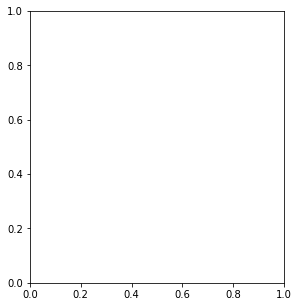

In [12]:
plt.figure(figsize = [10, 5])

# histogram on left: full data
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, df['skew_var'].max()+2.5, 2.5)
plt.hist(data = df, x = 'skew_var', bins = bin_edges)

# histogram on right: focus in on bulk of data < 35
plt.subplot(1, 2, 2)
bin_edges = np.arange(0, 35+1, 1)
plt.hist(data = df, x = 'skew_var', bins = bin_edges)
plt.xlim(0, 35) # could also be called as plt.xlim((0, 35))


![title](images/graph1.png)

For anything that is concentrated on the bulk of the data in the former group (< 35), use of axis limits can allow focusing on data points in that range without needing to go through creation of a new DataFrame filtering out the data points in the latter group (> 35).